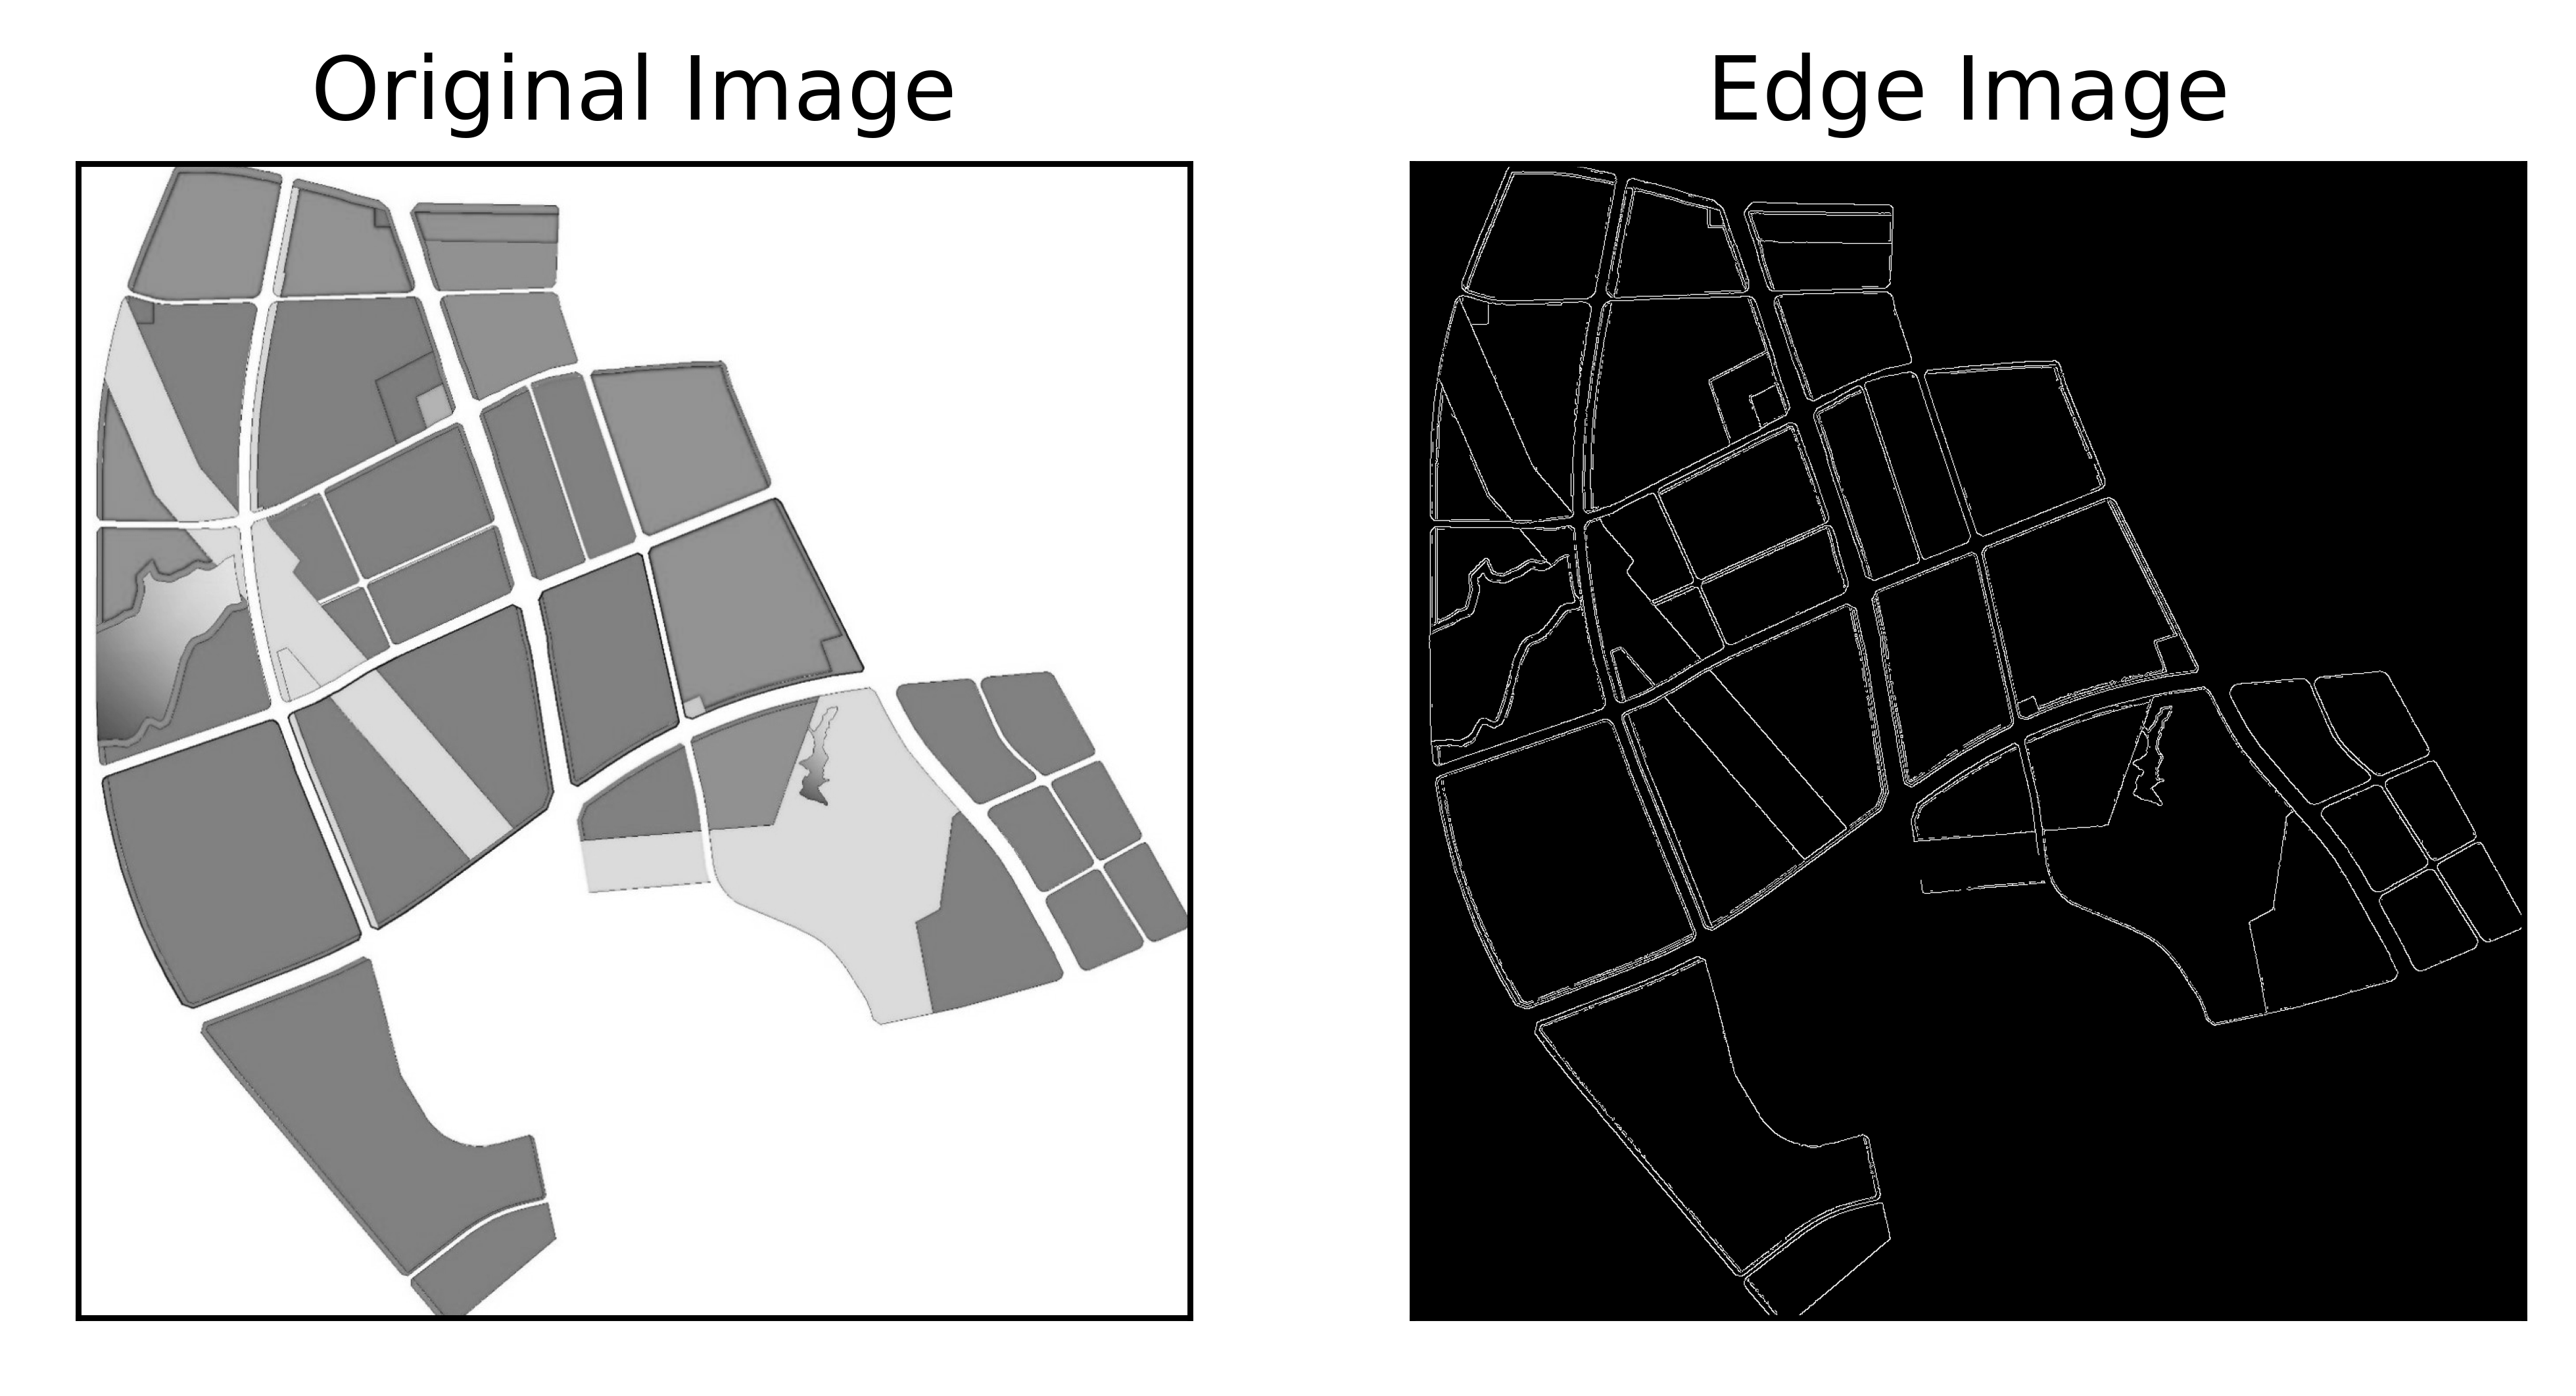

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('partition2.png',0)
edges = cv.Canny(img,100,200)

plt.figure(dpi=800)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
import numpy as np
import cv2 as cv

im = cv.imread('partition1.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 252, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img = im.copy()
# To draw all the contours in an image:
cv.drawContours(img, contours, -1, (0,255,0), 3)
# To draw an individual contour, say 4th contour:
# cv.drawContours(img, contours, 3, (0,255,0), 3)
# But most of the time, below method will be useful:
# cnt = contours[4]
# cv.drawContours(img, [cnt], 0, (0,255,0), 3)

cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
import numpy as np
import cv2 as cv

img = cv.imread('partition2.png',0)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv.moments(cnt)
print( M )

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print('{},{}', cx, cy)

area = cv.contourArea(cnt)

perimeter = cv.arcLength(cnt,True)

# Contour Approximation
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

# Checking Convexity
k = cv.isContourConvex(cnt)

# Straight Bounding Rectangle
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# Rotated Rectangle
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


ZeroDivisionError: float division by zero

In [ ]:
# Mask and Pixel Points
# we may use this to check if the chunked contour is in the original contour by mask or points comparison
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)

In [ ]:
# maximum Value, Minimum Value and their locations
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)

In [ ]:
# Mean Color or Mean Intensity 
# average color of an object. 
mean_val = cv.mean(im,mask = mask)

In [ ]:
# Extreme Points
# Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.
# this one is useful to find the begine coordinate, what we need is to mix the image together
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
